In [15]:
%pip install epyt-flow
from epyt import epanet
import tempfile
import requests
import os
!git clone https://github.com/Witold21/WDN.git
import os
os.chdir('/content/WDN/EPYT')
!ls
inpname = ("Walkerton_v1.inp")
from epyt_flow.data.benchmarks import load_leakdb_scenarios
from epyt_flow.simulation import ScenarioSimulator
from epyt_flow.utils import to_seconds

fatal: destination path 'WDN' already exists and is not an empty directory.
 epyt_epanet_analysis.ipynb	   epyt_leakage_simulation_and_detection.ipynb	 Walkerton_v1.inp
'epy testy.ipynb'		   epyt_pressure_sensor_placement.ipynb		 WDN
 epytflow_leakagedetection.ipynb   REQUIREMENTS.txt


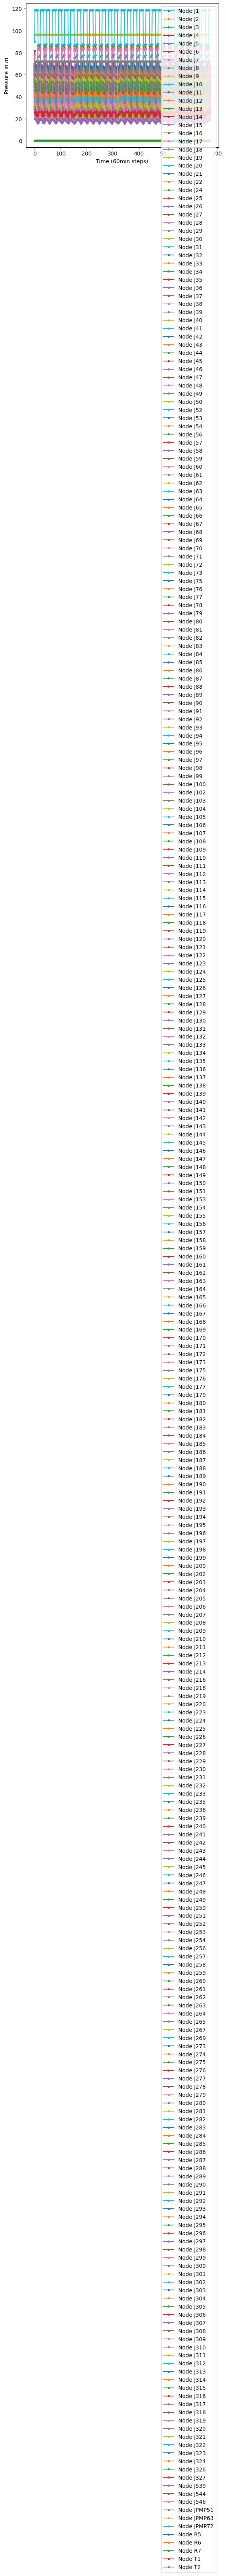

In [16]:
with ScenarioSimulator(inpname) as sim:
    sim.place_pressure_sensors_everywhere()
    scada_data = sim.run_simulation()
    observed_sensor_readings = scada_data.get_data()

    pressure_sensor_5_idx = scada_data.sensor_config.get_index_of_reading(
    pressure_sensor="J125")
    pressures_at_node_5 = observed_sensor_readings[:, pressure_sensor_5_idx]
    scada_data.plot_pressures()

In [17]:
print(pressures_at_node_5)

[54.53036616 54.08237827 53.87739038 53.67240405 53.46741715 53.03195359
 52.64773781 51.8415939  51.41774949 50.87024227 50.34458819 49.79478154
 50.00245762 51.00708068 52.17495986 52.30078438 52.5777767  52.80980954
 53.03962628 53.53932073 54.2194401  54.77760983 53.59884836 53.46784283
 53.37804806 53.23133176 53.08682145 52.93519664 52.78211334 52.37564793
 51.97987033 51.21424915 50.80948628 50.28473565 49.78028881 49.84102317
 51.65205214 52.1769369  52.36021157 52.66932706 53.0644162  53.63551382
 53.90327885 54.28489165 54.95850599 53.47625879 53.18006471 52.95389599
 52.85820744 52.69472654 52.54562968 52.39394679 52.24086352 51.83439605
 51.43861914 50.6282951  50.10466315 49.5716241  50.66504732 51.71080228
 52.14103717 52.29822311 52.5233239  52.92245389 53.83014747 54.02493246
 54.28998043 54.6720754  53.51077676 53.21845789 52.88680819 52.65100737
 52.55240448 52.39407863 52.24292733 52.09121816 51.93813319 51.53166726
 51.13589059 50.32606828 49.9014465  49.74983336 51